# Vehicle Collisions in Seattle
## Ben McDonald and Meghan Rogers  
CPSC 322, Spring 2021

In [119]:
# mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.juputils as juputils
importlib.reload(juputils)

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import matplotlib.pyplot as plt

# Introduction

Our dataset, collisons.csv, holds information about all types of vehicle collisions that have occurred in the city of Seattle.

The contents of the dataset include the date, location, severity description, weather, road conditions, light conditions,  
speed, vehicle count, injury count, and more about vehicle collisions that have occurred in Seattle, WA.

Our goal is to predict the collision type of an accident based on attributes such as the junction type, weather,  
road conditions, and light conditions. We found that our Naive Bayes classifier, with an accuracy of ~59%, performed the best.


# Data Analysis

The dataset that we chose was initially very large, but we decided to use the first ~5000 instances for our project.

We chose to use the attribute "COLLISIONTYPE" as our class label, and predicted the class label based on weather,  
road conditions, light conditions, severity description, and junction type.  
The different collison types are:
* Angles
* Parked Car
* Rear Ended
* Cycles
* Left Turn
* Sideswipe
* Pedestrian
* Right Turn
* Head On
* Other

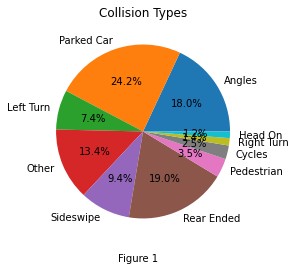

In [120]:
import os

fname = os.path.join("input_data", "collisions.csv")
collisions_data = MyPyTable().load_from_file(fname)
collisions_data.remove_rows_with_missing_values()

weather_col = collisions_data.get_column('WEATHER')
road_condition_col = collisions_data.get_column('ROADCOND')
light_condition_col = collisions_data.get_column('LIGHTCOND')
junction_col = collisions_data.get_column('JUNCTIONTYPE')
severity_col = collisions_data.get_column('SEVERITYDESC')
collision_col = collisions_data.get_column('COLLISIONTYPE')

collision_unique_labels = juputils.get_unique(collision_col)
# deleting this label because it is blank
del collision_unique_labels[6]
collision_counts = juputils.get_counts(collision_col, collision_unique_labels)

fig = plt.figure()
plt.pie(collision_counts, labels=collision_unique_labels, autopct="%1.1f%%")
plt.title("Collision Types")
fig.text(.5, .05, "Figure 1", ha='center')
plt.show()


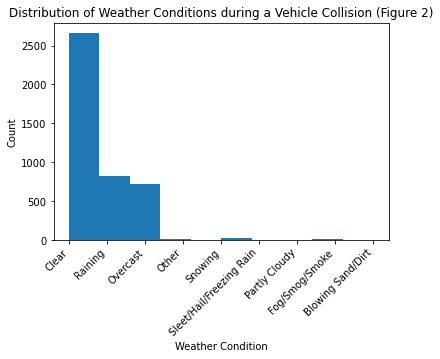

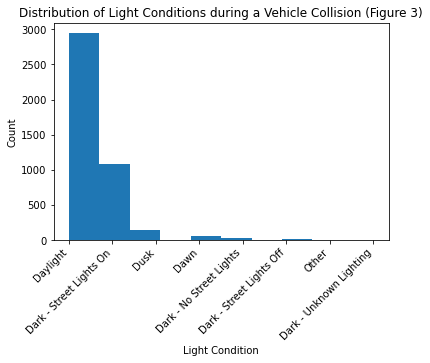

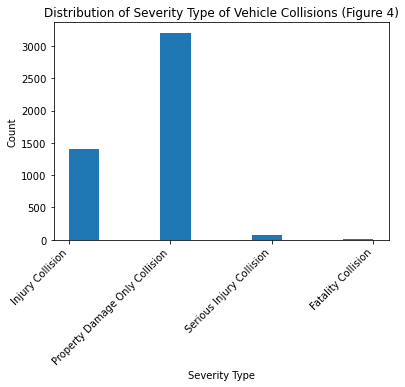

In [121]:
weather = [weather_col[i] for i in range(len(weather_col)) if weather_col[i] != "" and weather_col[i] != "Unknown"]
plt.hist(weather)
plt.xticks(rotation=45, horizontalalignment="right")
plt.title("Distribution of Weather Conditions during a Vehicle Collision (Figure 2)")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()

light = [light_condition_col[i] for i in range(len(light_condition_col)) if light_condition_col[i] != "Unknown" and light_condition_col[i] != ""]
plt.hist(light)
plt.xticks(rotation=45, horizontalalignment="right")
plt.title("Distribution of Light Conditions during a Vehicle Collision (Figure 3)")
plt.xlabel("Light Condition")
plt.ylabel("Count")
plt.show()

severity = [severity_col[i] for i in range(len(severity_col)) if severity_col[i] != "Unknown" and severity_col[i] != ""]
plt.hist(severity)
plt.xticks(rotation=45, horizontalalignment="right")
plt.title("Distribution of Severity Type of Vehicle Collisions (Figure 4)")
plt.xlabel("Severity Type")
plt.ylabel("Count")
plt.show()

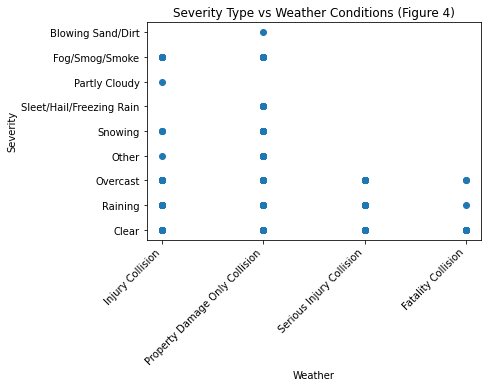

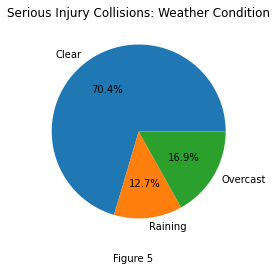

In [122]:
weather = []
severity = []
for i in range(len(weather_col)):
    if weather_col[i] != "" and weather_col[i] != "Unknown":
        if severity_col[i] != "Unknown":
            weather.append(weather_col[i])
            severity.append(severity_col[i])

plt.figure()
plt.scatter(severity, weather)
plt.xticks(rotation=45, horizontalalignment="right")
plt.title("Severity Type vs Weather Conditions (Figure 4)")
plt.xlabel("Weather")
plt.ylabel("Severity")
plt.show()

weather_counts = [0, 0, 0]
for i in range(len(severity_col)):
    if severity_col[i] == "Serious Injury Collision":
        if weather_col[i] == "Clear":
            weather_counts[0] += 1
        elif weather_col[i] == "Raining":
            weather_counts[1] += 1
        elif weather_col[i] == "Overcast":
            weather_counts[2] += 1

fig = plt.figure()
plt.pie(weather_counts, labels=["Clear", "Raining", "Overcast"], autopct="%1.1f%%")
plt.title("Serious Injury Collisions: Weather Condition")
fig.text(.5, .05, "Figure 5", ha='center')
plt.show()

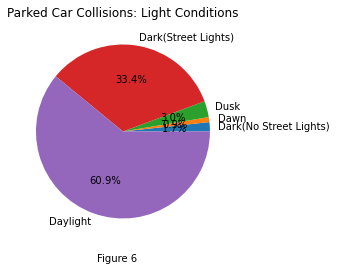

In [123]:
collision_column = collisions_data.get_column('COLLISIONTYPE')

light_counts = [0, 0, 0, 0, 0]
light_labels = ["Dark(No Street Lights)", "Dawn", "Dusk", "Dark(Street Lights)", "Daylight"]
for i in range(len(collision_column)):
    if collision_col[i] == "Parked Car":
        if light_condition_col[i] == "Dark - No Street Lights":
            light_counts[0] += 1
        elif light_condition_col[i] == "Dawn":
            light_counts[1] += 1
        elif light_condition_col[i] == "Dusk":
            light_counts[2] += 1
        elif light_condition_col[i] == "Dark - Street Lights On":
            light_counts[3] += 1
        elif light_condition_col[i] == "Daylight":
            light_counts[4] += 1

fig = plt.figure()
plt.pie(light_counts, labels=light_labels, autopct="%1.1f%%")
plt.title("Parked Car Collisions: Light Conditions")
fig.text(.5, .05, "Figure 6", ha='center')
plt.show()

In [124]:
# TODO: Finish figure descriptions

First, we want to show the distribution of our class label using a pie chart (Figure 1).  
The class label that occurs most frequently is "Parked Car", and the label that occurs the least is "Head On."

Figures 2 and 3  ...

In [125]:
# TODO: Finish Classification Results

# Classification Results

Naive Bayes:

Decision Tree:

Random Forest:

Comparatively, the Naive Bayes classifier out performed the other two classifiers. We evaluated performance based on  
predictive accuracy. The results from our Naive Bayes classifier can be found below.

**Link to Heroku web app**: 


In [128]:
import os
importlib.reload(juputils)

fname = os.path.join("input_data", "collisions.csv")
collisions_data = MyPyTable().load_from_file(fname)
# Use: WEATHER, ROADCOND, LIGHTCOND, JUNCTIONTYPE, SEVERITYDESC
# Predict: COLLISIONTYPE
weather = collisions_data.get_column('WEATHER')
road_condition = collisions_data.get_column('ROADCOND')
light_condition = collisions_data.get_column('LIGHTCOND')
junction_type = collisions_data.get_column('JUNCTIONTYPE')
severity = collisions_data.get_column('SEVERITYDESC')

X_train = [[weather[i],road_condition[i],light_condition[i],junction_type[i],severity[i]] for i in range(len(weather))]
y_train = collisions_data.get_column('COLLISIONTYPE')

for i,val in enumerate(y_train):
    if val == 'Unknown':
        del y_train[i]
        del X_train[i]

strattrain_folds, strattest_folds = myevaluation.stratified_kfold_cross_validation(X_train, y_train, 10)
strat_xtrain, strat_ytrain, strat_xtest, strat_ytest = myutils.get_from_folds(X_train, y_train, strattrain_folds, strattest_folds)

myb = MyNaiveBayesClassifier()
myb.fit(strat_xtrain, strat_ytrain)

predicted = myb.predict(strat_xtest)
accuracy = juputils.get_accuracy(strat_ytest, predicted)
print('Naive Bayes: accuracy =', accuracy, 'error rate = ', (1-accuracy))

print('\n=================================================\n\
Confusion Matrix: Naive Bayes and Collision Type\n\
=================================================\n')
collision_unique_labels = juputils.get_unique(collision_col)
matrix = myevaluation.confusion_matrix(strat_ytest, predicted, collision_unique_labels)

table_header = ['TEST', 1,2, 3 ,4, 5, 6, 7, 8,9,10, 'Total', 'Recognition (%)']
juputils.add_conf_stats(matrix)
juputils.print_tabulate(matrix, table_header)
print("\nMATRIX KEY")
for i in range(len(collision_unique_labels)):
    if collision_unique_labels[i] != "":
        print(i+1, ":", collision_unique_labels[i])
    else:
        print(i+1, ": Unknown")


        

Naive Bayes: accuracy = 0.5887272727272728 error rate =  0.41127272727272723

Confusion Matrix: Naive Bayes and Collision Type

======  ===  ===  ===  ===  ===  ===  ===  ===  ===  ====  =======  =================
  TEST    1    2    3    4    5    6    7    8    9    10    Total    Recognition (%)
======  ===  ===  ===  ===  ===  ===  ===  ===  ===  ====  =======  =================
     1  839    0   83   39  129    1    1    2    0     0     1095              76.62
     2   13    2   15    0   24    0    4    6    0     0       66               3.03
     3  180    1  173   21  152    0    0    2    0     1      533              32.46
     4  164    0   26   34  125    0    0    0    0     0      353               9.63
     5  168    0   34   40  559    0    2    3    0     0      811              68.93
     6    0    0    0    0    0  909    0    0    0     0      915              99.34
     7    8    1   10    0   35    2    6    4    0     0       73               8.22
     8    8 

In [127]:
# TODO: Finish Conclusion

# Conclusion

The dataset we used provided us with some challenges. One of them being that many of the attribute values were  
"unknown" or left blank because not all of the information about a collision is always available. In order to  
potentially improve the performance of our classification, we could have cleaned the dataset more or forced  
the instances we chose to be more evenly distributed based on class label "COLLISIONTYPE". 

The classification approach we developed was simply to use our Naive Bayes classifier to predict the collision  
type of any given vehicle collision based on the severity, weather, road conditions, light conditions, and junction type.  
In the end, our Naive Bayes classifier had an error rate of ~41%.


Dataset source: https://catalog.data.gov/dataset/collisions